### Dataset Creation

In [2]:
	#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This script combines the data from the UCI HAR Dataset into a more usable format.
# The data is combined into a single csv file for each subject and activity. 
# The data is then stored in the Combined folder.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "UCI HAR Dataset/train"
test_path = "UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {
    1: 'WALKING'            ,
    2: 'WALKING_UPSTAIRS'   ,
    3: 'WALKING_DOWNSTAIRS' ,
    4: 'SITTING'            ,
    5: 'STANDING'           ,
    6: 'LAYING'             ,
}

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Traing Data
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),delim_whitespace=True,header=None)


# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                        # Combining Test Data               
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),delim_whitespace=True,header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),delim_whitespace=True,header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")
print("Done Combining the data")

#-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

/tmp/ipykernel_10864/2099542480.py:35: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_10864/2099542480.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_10864/2099542480.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_10864/2099542480.py:41: FutureWarning: The 'delim

Done Combining the training data


/tmp/ipykernel_10864/2099542480.py:90: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_10864/2099542480.py:91: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_10864/2099542480.py:92: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),delim_whitespace=True,header=None)
/tmp/ipykernel_10864/2099542480.py:95: FutureWarning: The 'delim_white

Done Combining the testing data
Done Combining the data


In [3]:
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
#
#                                   ES335- Machine Learning- Assignment 1
#
# This file is used to create the dataset for the mini-project. The dataset is created by reading the data from
# the Combined folder. The data is then split into training, testing, and validation sets. This split is supposed
# to be used for all the modeling purposes.
#
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Train Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Test Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
                                                # Final Dataset
#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

# USE THE BELOW GIVEN DATA FOR TRAINING and TESTING purposes

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training and testing sets. Change the seed value to obtain different random splits.
seed = 4
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)

#=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-==-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=




Training data shape:  (126, 500, 3)
Testing data shape:  (54, 500, 3)


In [158]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 2

### Q.1 Decision tree with raw accelerometer data

In [159]:
X_train.shape, y_train.shape

((126, 500, 3), (126,))

In [160]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train.reshape((X_train.shape[0], -1)), y_train)

# Predictions
y_pred = dec_tree.predict(X_test.reshape((X_test.shape[0], -1)))
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')

Test Accuracy: 0.6111
Test Precision: 0.5803
Test Recall: 0.6111


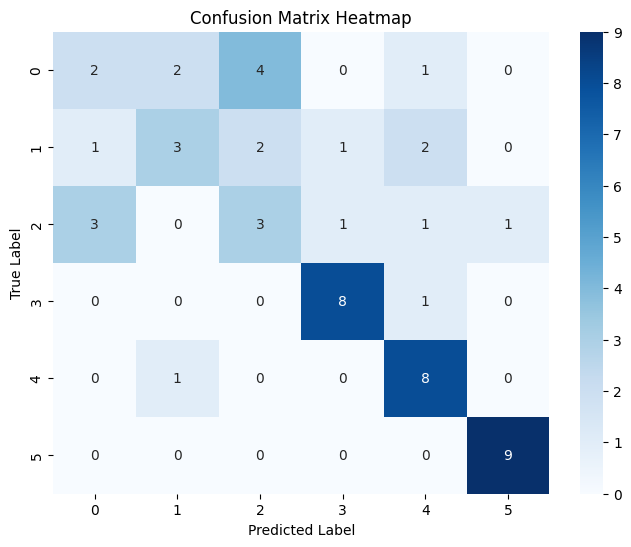

In [162]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

## TASK-1

### Q 3.1

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [136]:
# Creation of new dataframe that 
# has the linear acceration instead
# of its individual component
squared_sum = np.sum(X_train ** 2, axis=2)
X_train_new = pd.DataFrame(squared_sum)

In [139]:
X_train.shape, X_train_new.shape

((126, 500, 3), (126, 500))

In [79]:
activity_mapping = {
    "LAYING" : 1,
    "SITTING" : 2,
    "STANDING" : 3,
    "WALKING" : 4,
    "WALKING_DOWNSTAIRS" : 5,
    "WALKING_UPSTAIRS" : 6
}

In [143]:
def pca_plot(df, x_total_left, x_total_right, y_total_left, y_total_right, x_left, x_right, y_left, y_right):
    standardised_data = StandardScaler().fit_transform(df)
    pca = PCA(n_components=2)
    pca_features = pca.fit_transform(standardised_data)
    
    pca_df = pd.DataFrame(pca_features, columns=['PC1', 'PC2'])
    pca_df['Activity'] = y_train
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    axes[0].set_xlim(x_total_left, x_total_right)
    axes[0].set_ylim(y_total_left, y_total_right)
    axes[0].set_title('PCA of Total Acceleration Magnitude')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    
    activities = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
    for activity in activities:
        subset = pca_df[pca_df['Activity'] == activity_mapping[activity]]
        axes[0].scatter(subset['PC1'], subset['PC2'], label=activity, alpha=0.7)
    
    axes[0].legend()
    axes[0].grid(True)
    
    # Plot to focus on the static activities which are clustered
    axes[1].set_xlim(x_left, x_right)
    axes[1].set_ylim(y_left, y_right)
    axes[1].set_title('Zoomed in')
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    
    for activity in activities:
        subset = pca_df[pca_df['Activity'] == activity_mapping[activity]]
        axes[1].scatter(subset['PC1'], subset['PC2'], label=activity, alpha=0.7)
    
    axes[1].legend()
    axes[1].grid(True)
    
    plt.tight_layout()
    plt.show()

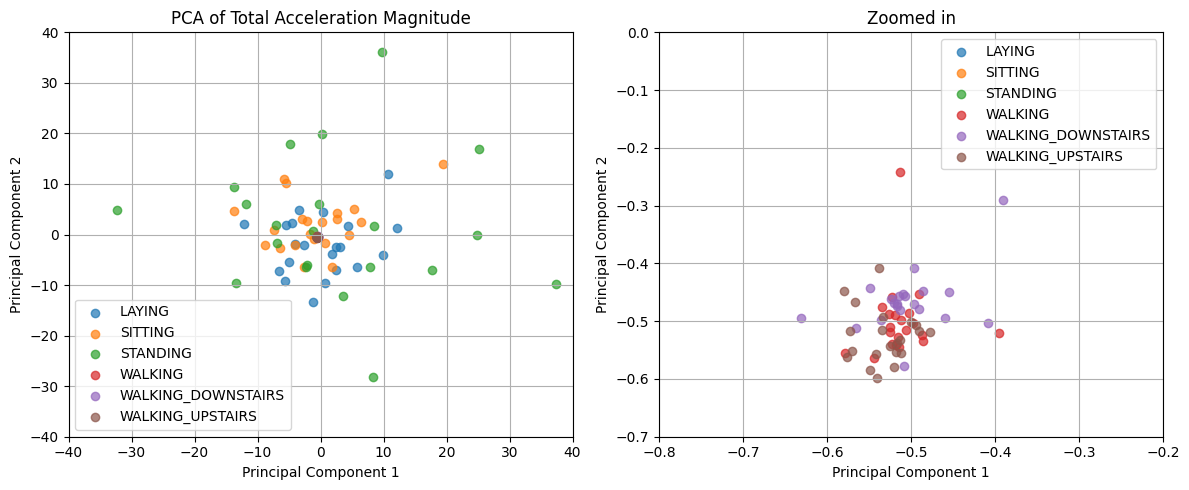

In [145]:
pca_plot(X_train_new, -40, 40, -40, 40, -0.8, -0.2, -0.7, 0)

In [146]:
X_train_new.shape

(126, 500)

### Q 3.2

In [147]:
import tsfel
def make_dataset_with_features(df, arg) -> pd.DataFrame:
    cfg = tsfel.get_features_by_domain(None)

    # Extraction of features
    df_X = tsfel.time_series_features_extractor(cfg, df.loc[0], fs=50, verbose=0)
    for ind in range(1, len(df)):
      temp = tsfel.time_series_features_extractor(cfg, df.loc[ind], fs=50, verbose=0)
      df_X = pd.concat([df_X, temp]).reset_index(drop=True)
    
    return df_X

In [148]:
df_X = make_dataset_with_features(X_train_new, None) #Applying all the feature extraction
df_X

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_1.39Hz,0_Wavelet variance_1.56Hz,0_Wavelet variance_1.79Hz,0_Wavelet variance_12.5Hz,0_Wavelet variance_2.08Hz,0_Wavelet variance_2.5Hz,0_Wavelet variance_3.12Hz,0_Wavelet variance_4.17Hz,0_Wavelet variance_6.25Hz,0_Zero crossing rate
0,675.840090,11.014910,7.0,67.719448,4.866706,100.0,400.0,0.820966,1.402758,0.002,...,2.387317,1.993713,1.530534,0.012061,1.071312,0.687076,0.398451,0.202929,0.075825,0.0
1,541.556536,10.386228,2.0,54.264182,4.993917,100.0,400.0,1.034610,1.046702,0.002,...,0.107860,0.086186,0.066874,0.001454,0.049442,0.034576,0.022310,0.012746,0.005764,0.0
2,560.094365,10.560741,3.0,56.121680,4.998758,100.0,400.0,1.052052,1.064478,0.002,...,0.112987,0.090029,0.069858,0.001607,0.051934,0.036911,0.024706,0.014917,0.006878,0.0
3,790.878567,11.507018,5.0,79.246349,4.992194,100.0,400.0,0.727864,1.604637,0.002,...,2.718790,2.915697,2.803328,0.065167,2.357540,1.704906,1.034778,0.537940,0.256717,0.0
4,797.157180,11.470409,5.0,79.875469,4.969804,100.0,400.0,0.712381,1.496676,0.002,...,3.611584,3.847647,3.573048,0.050928,2.834754,1.907155,1.079739,0.546883,0.265680,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,645.223865,10.950628,4.0,64.651690,4.961990,100.0,400.0,0.799052,1.354263,0.002,...,1.132426,1.204510,1.139519,0.021694,0.934714,0.649926,0.367826,0.174711,0.092922,0.0
122,502.227065,10.001152,47.0,50.323353,5.036110,100.0,400.0,0.992955,1.009923,0.002,...,0.103131,0.082273,0.063807,0.001359,0.047318,0.033353,0.021751,0.012404,0.005443,0.0
123,520.603411,10.183012,2.0,52.164670,4.992070,100.0,400.0,1.012534,1.027470,0.002,...,0.102197,0.081001,0.062547,0.001444,0.046251,0.032518,0.021292,0.012468,0.005694,0.0
124,746.480106,11.149920,5.0,74.797606,4.949809,100.0,400.0,0.711075,1.428686,0.002,...,3.721399,3.551502,3.023274,0.024199,2.275280,1.532350,0.926435,0.493786,0.190715,0.0


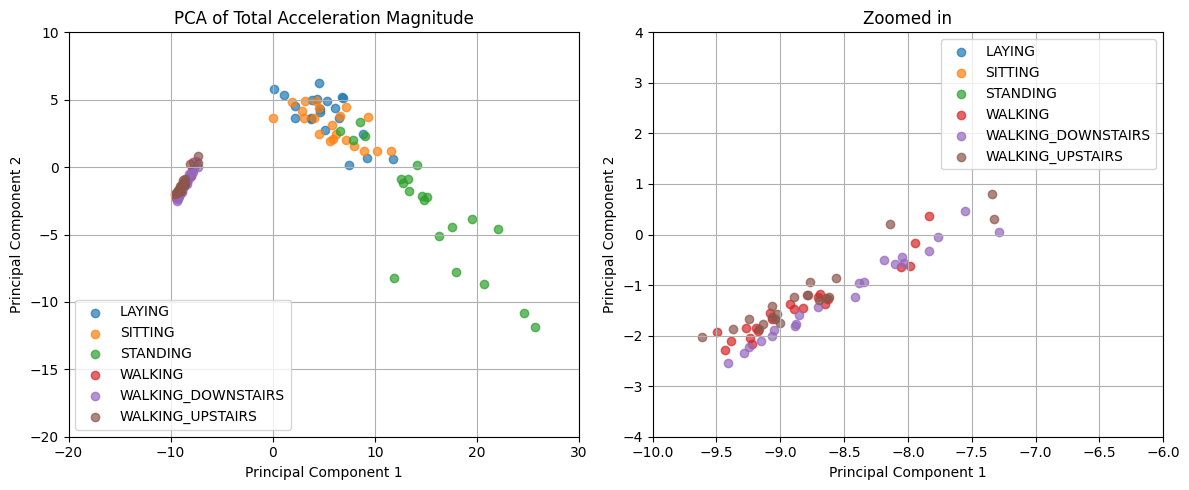

In [149]:
pca_plot(df_X, -20, 30, -20, 10, -10, -6, -4, 4)

### Q 4. Correlation matrix for TSFEL generated features

In [150]:
df_X.corr()

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_1.39Hz,0_Wavelet variance_1.56Hz,0_Wavelet variance_1.79Hz,0_Wavelet variance_12.5Hz,0_Wavelet variance_2.08Hz,0_Wavelet variance_2.5Hz,0_Wavelet variance_3.12Hz,0_Wavelet variance_4.17Hz,0_Wavelet variance_6.25Hz,0_Zero crossing rate
0_Absolute energy,1.000000,0.959965,-0.079470,1.000000,0.130330,NaN,NaN,-0.923975,0.962545,NaN,...,0.937775,0.969855,0.980588,0.916517,0.977586,0.970595,0.967483,0.969414,0.970395,NaN
0_Area under the curve,0.959965,1.000000,-0.105048,0.959965,0.122097,NaN,NaN,-0.923528,0.966566,NaN,...,0.886451,0.904335,0.903824,0.872993,0.892592,0.879687,0.871193,0.871491,0.893269,NaN
0_Autocorrelation,-0.079470,-0.105048,1.000000,-0.079470,-0.048393,NaN,NaN,0.053165,-0.073605,NaN,...,-0.060412,-0.061046,-0.060397,-0.076707,-0.059279,-0.058435,-0.058184,-0.059943,-0.069714,NaN
0_Average power,1.000000,0.959965,-0.079470,1.000000,0.130330,NaN,NaN,-0.923975,0.962545,NaN,...,0.937775,0.969855,0.980588,0.916517,0.977586,0.970595,0.967483,0.969414,0.970395,NaN
0_Centroid,0.130330,0.122097,-0.048393,0.130330,1.000000,NaN,NaN,-0.058676,0.141180,NaN,...,0.148373,0.153943,0.153053,0.010769,0.148640,0.145557,0.150273,0.152415,0.089749,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0_Wavelet variance_2.5Hz,0.970595,0.879687,-0.058435,0.970595,0.145557,NaN,NaN,-0.866579,0.920332,NaN,...,0.889338,0.947060,0.981223,0.861637,0.996650,1.000000,0.997848,0.988909,0.951627,NaN
0_Wavelet variance_3.12Hz,0.967483,0.871193,-0.058184,0.967483,0.150273,NaN,NaN,-0.853474,0.908836,NaN,...,0.881663,0.938961,0.973854,0.866686,0.991273,0.997848,1.000000,0.995368,0.959207,NaN
0_Wavelet variance_4.17Hz,0.969414,0.871491,-0.059943,0.969414,0.152415,NaN,NaN,-0.849844,0.898635,NaN,...,0.890961,0.941238,0.969845,0.886413,0.982986,0.988909,0.995368,1.000000,0.976591,NaN
0_Wavelet variance_6.25Hz,0.970395,0.893269,-0.069714,0.970395,0.089749,NaN,NaN,-0.870666,0.892361,NaN,...,0.894344,0.931847,0.948010,0.952607,0.951049,0.951627,0.959207,0.976591,1.000000,NaN


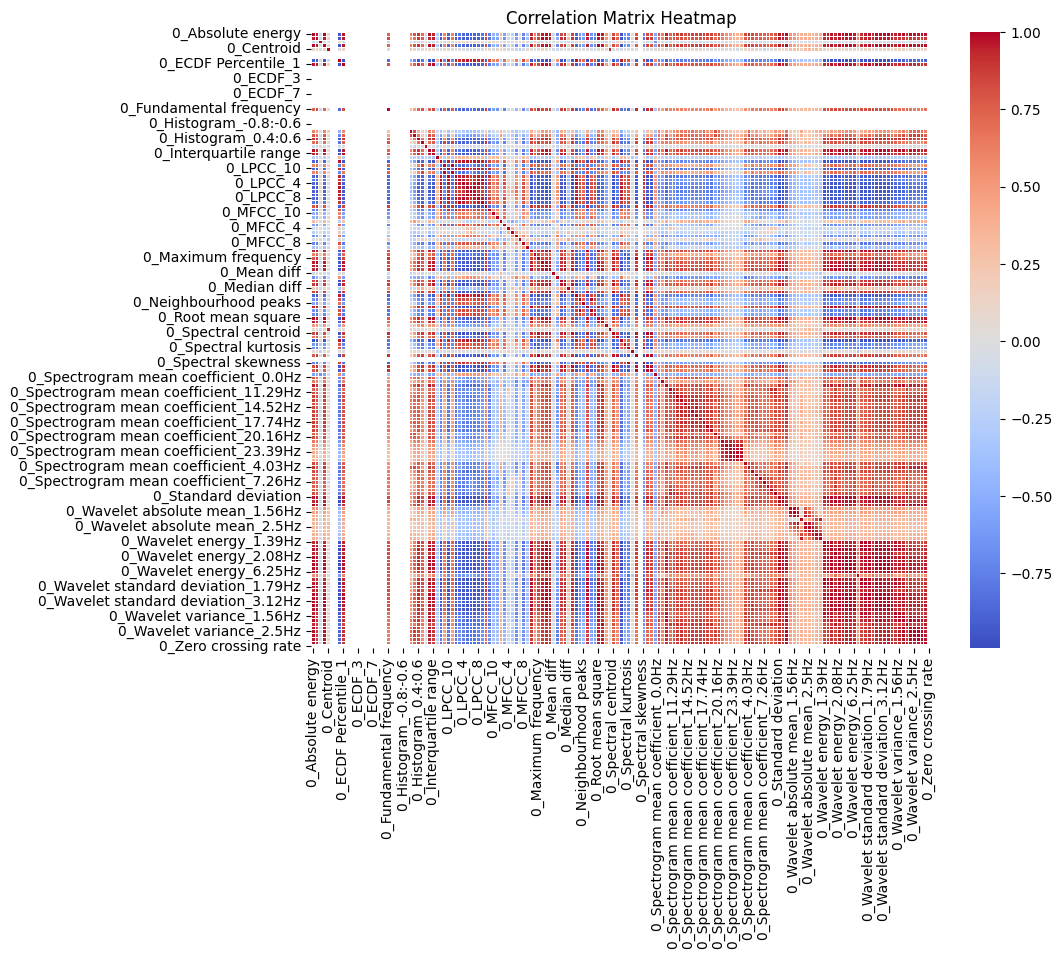

In [151]:
import seaborn as sns

corr_matrix = df_X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## TASK-2:
#### Q 1.2

In [124]:
x_new_test.shape, y_test.shape

((180, 165), (54,))

In [153]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


df = df_X.to_numpy()
dec_tree = DecisionTreeClassifier(max_features=1500, max_depth=5)
dec_tree.fit(df.reshape((df.shape[0], -1)), y_train)

# Predictions
new_x_test = pd.DataFrame(np.sum(X_test**2, axis=2))
x_new_test = make_dataset_with_features(new_x_test, None).to_numpy()
y_pred = dec_tree.predict(x_new_test.reshape((x_new_test.shape[0], -1)))

test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test Precision: {test_precision:.4f}')
print(f'Test Recall: {test_recall:.4f}')

Test Accuracy: 0.7407
Test Precision: 0.7409
Test Recall: 0.7407


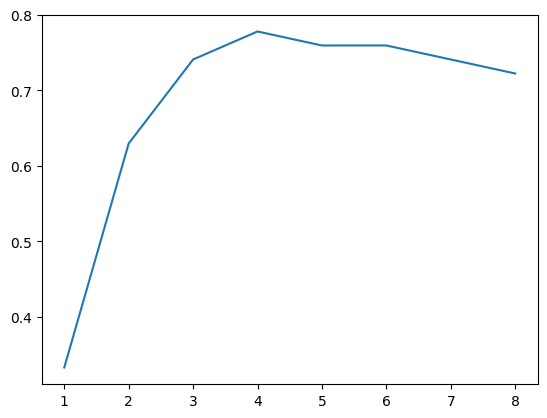

In [157]:
accuracy = []
tree_depth = []

df = df_X.to_numpy()
new_x_test = pd.DataFrame(np.sum(X_test**2, axis=2))

for depth in range(1, 9):
    dec_tree = DecisionTreeClassifier(max_depth=depth)
    dec_tree.fit(df.reshape((df.shape[0], -1)), y_train)
    
    # Predictions
    x_new_test = make_dataset_with_features(new_x_test, None).to_numpy()
    y_pred = dec_tree.predict(x_new_test.reshape((x_new_test.shape[0], -1)))
    
    test_accuracy = accuracy_score(y_test, y_pred)

    accuracy.append(test_accuracy)
    tree_depth.append(depth)

plt.plot(tree_depth, accuracy)